In [1]:
#imporitng plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

#import sklearn packages
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
#Read the csv data into a dataframe
boomBike = pd.read_csv("day.csv")

In [3]:
#View sample data
boomBike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#View the data type of data
boomBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#View statistical inforamtion
boomBike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#View shape of dataframe
print(boomBike.shape)

(730, 16)


In [7]:
# Check for duplicates. Remove duplicate row if any
boomBike_dupl = boomBike.copy()
boomBike_dupl.drop_duplicates(subset=None, inplace=True)

In [8]:
#check the shape of duplicate dataframe created
boomBike_dupl.shape

(730, 16)

We can conclude that there are no duplicates, By seeing the both boomBike_dupl and boomBike.

In [9]:
#Check the value counts of the dataframe
boomBike.value_counts(ascending=False).head(1)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt
1        01-01-2018  1       0   1     0        1        1           2           14.110847  18.18125  80.5833  10.749882  331     654         985    1
Name: count, dtype: int64

In [10]:
#Get the names of columns
boomBike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
boomBike.drop(['instant'],axis=1,inplace=True)
boomBike.drop(['dteday'],axis=1,inplace=True)
boomBike.drop(['casual'],axis=1,inplace=True)
boomBike.drop(['registered'],axis=1,inplace=True)

In [12]:
#Check the shape of new dataframe.
boomBike.shape

(730, 12)

In [13]:
# Checking Correlation of dataframe
boomBike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


# Observation -
    There is a positive correlation between the total bike rentals (cnt) and both temperature (temp) and perceived temperature (atemp). Conversely, there is a negative correlation with wind speed and humidity (hum).
    

In [14]:
#check unique values present in data
boomBike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [15]:
# Map the integer values of the season variable to the associated string labels

boomBike['season'] =  boomBike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
boomBike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Check the value counts of season column
boomBike.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [18]:
# Convert Feature 'weathersit' from integer to categorical
boomBike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
boomBike['weathersit'].value_counts()

weathersit
good        463
moderate    246
bad          21
Name: count, dtype: int64

In [19]:
# Convert 'weekday' to object 
boomBike.weekday = boomBike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
boomBike['weekday'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], dtype=object)

In [20]:
# Convert feature 'mnth' to categorical
boomBike.mnth = boomBike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
boomBike['mnth'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept',
       'oct', 'nov', 'dec'], dtype=object)

In [21]:
boomBike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


#    Data_Visualisation
    

<Figure size 1000x1500 with 0 Axes>

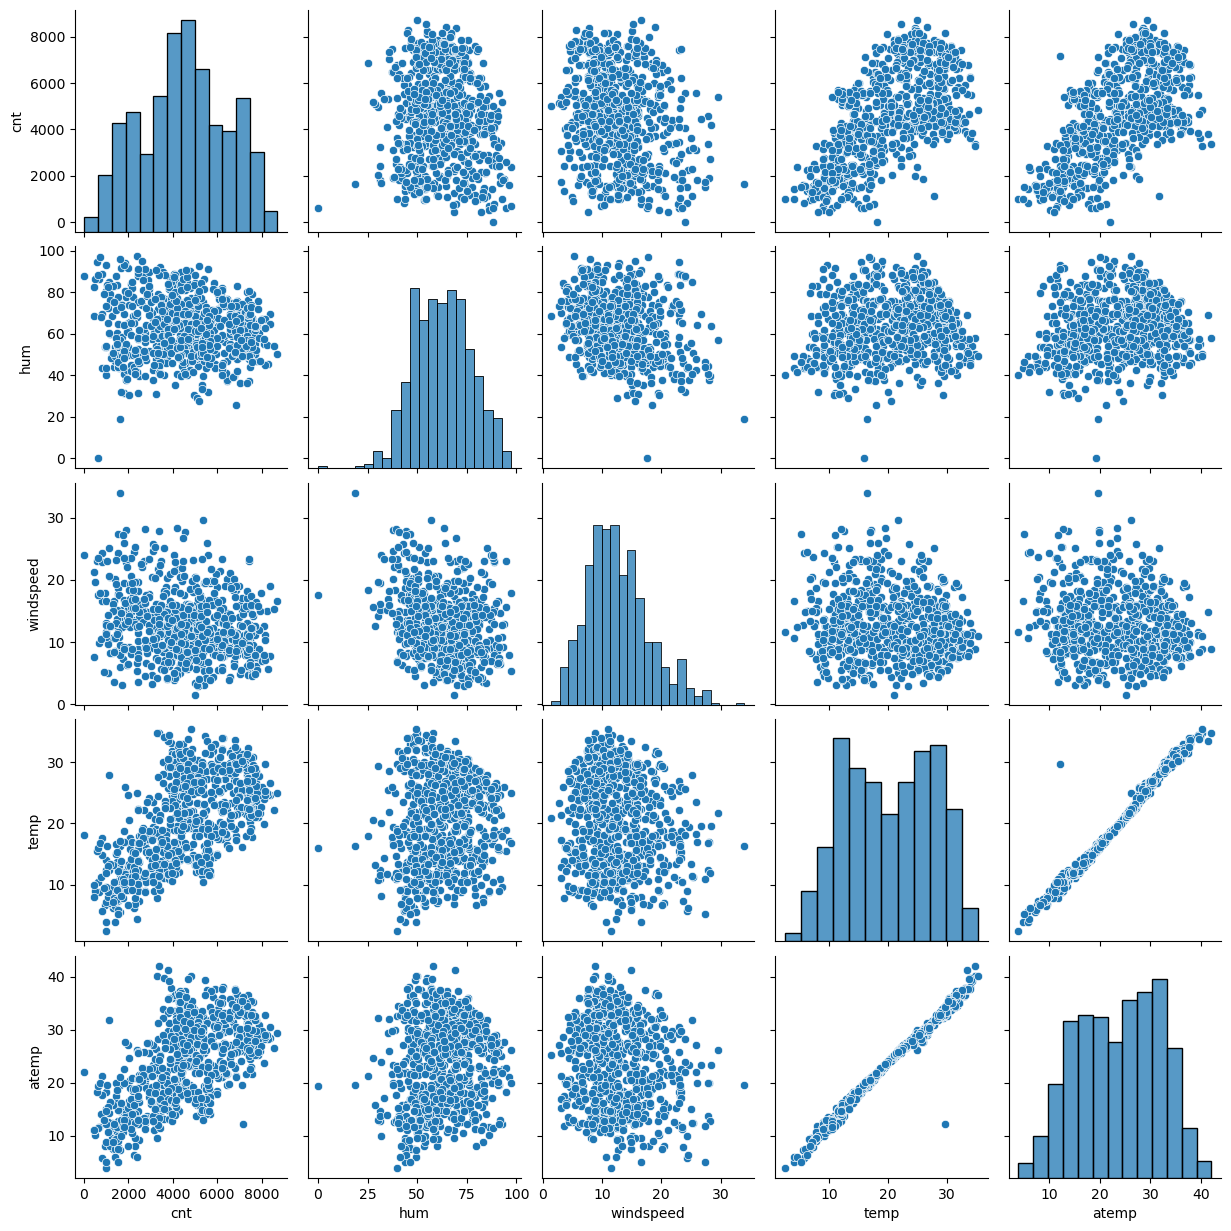

In [23]:
plt.figure(figsize = (10,15))
sns.pairplot(data=boomBike,vars=['cnt','hum','windspeed', 'temp', 'atemp'])
plt.show()

The pairplot reveals relationships between bike rentals (cnt) and weather conditions (temperature, apparent temperature, humidity, windspeed). It highlights potential linear correlations, aiding in understanding how weather impacts rental demand.

# HEATMAP
Building Heatmap to see the correlation between variables in the data set

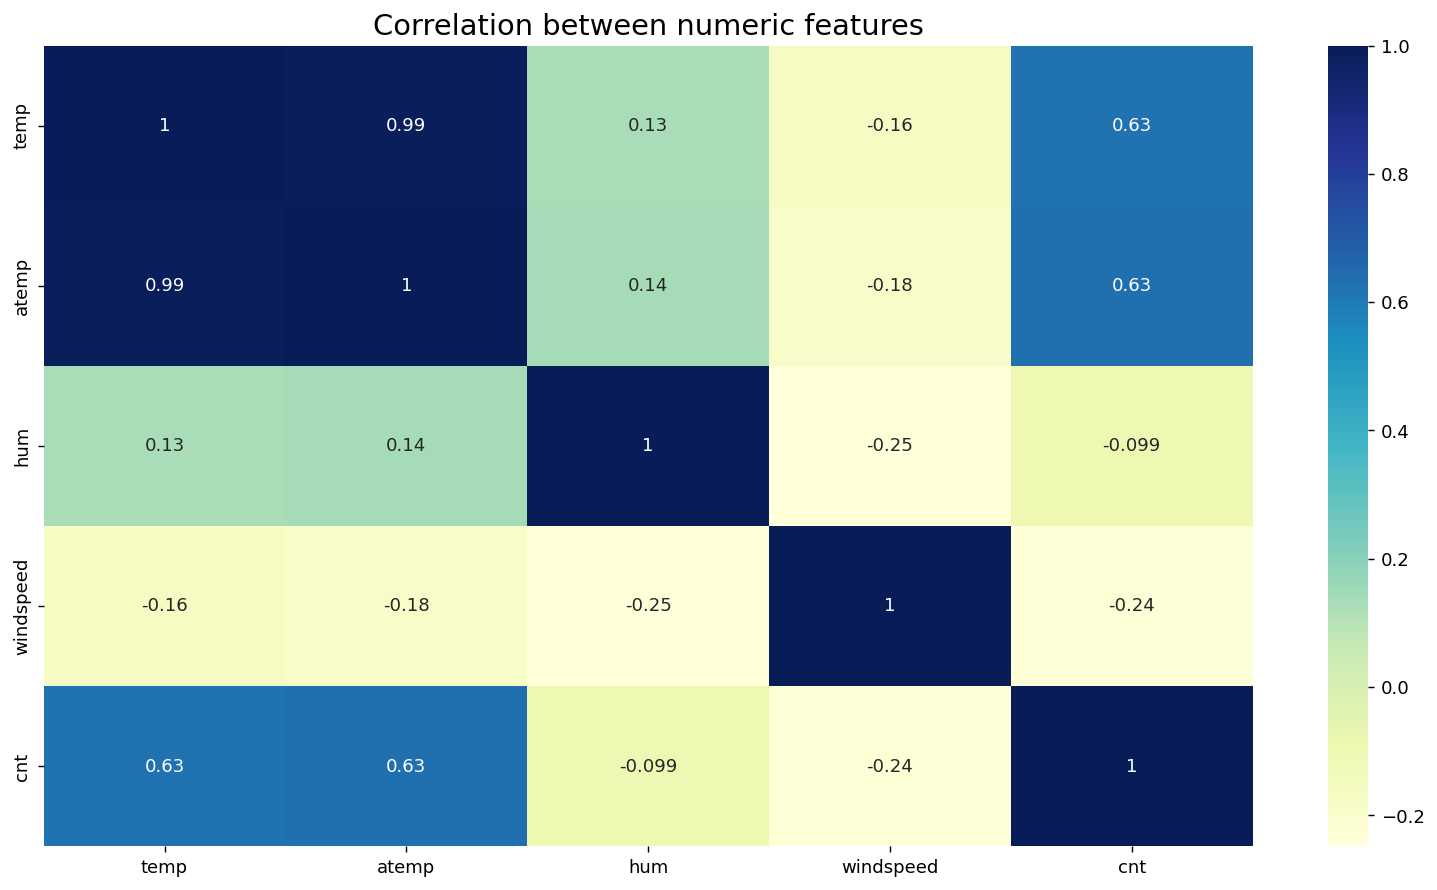

In [24]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation between numeric features",fontsize=16)
sns.heatmap(boomBike[num_features].corr(),annot= True,cmap="YlGnBu")
plt.show()

In [25]:
boomBike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Dummy Variable Creation

In [26]:
#We will create dummy variables for the features - 'mnth', 'weekday', 'season' & 'weathersit'
boomBike = pd.get_dummies(data=boomBike,columns=["season","mnth","weekday"],drop_first=True)
boomBike = pd.get_dummies(data=boomBike,columns=["weathersit"])

In [27]:
#Check the shape of the dataframe after creating dummy variables
boomBike.shape

(730, 31)

In [28]:
boomBike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,True,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
#y to contain only target variable
y=boomBike.pop('cnt')

#X is all remainign variable also our independent variables
X=boomBike

#Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [30]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [31]:
# Check shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(438, 30)
(292, 30)


In [32]:
# Scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [33]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.520548,0.022831,0.682648,0.554282,0.529962,0.662033,0.414665
std,0.500149,0.149535,0.465978,0.226207,0.211926,0.142902,0.185562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354526,0.354876,0.555519,0.281934
50%,1.000000,0.000000,1.000000,0.576343,0.566617,0.668398,0.382404
75%,1.000000,0.000000,1.000000,0.748454,0.700677,0.763905,0.521809
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
328,0,0,0,0.393589,0.395893,0.668831,0.191619,False,False,True,...,False,False,False,True,False,False,False,False,True,False
153,0,0,0,0.698871,0.666902,0.367966,0.577906,False,True,False,...,False,False,False,True,False,False,False,False,True,False
75,0,0,0,0.443431,0.434828,0.626407,0.468847,True,False,False,...,False,False,True,False,False,False,False,False,True,False
585,1,0,1,0.868126,0.814409,0.644589,0.334898,False,False,False,...,False,False,False,False,False,False,False,False,True,False
277,0,0,1,0.597110,0.588150,0.673161,0.387873,False,False,True,...,False,False,False,False,False,False,False,False,True,False


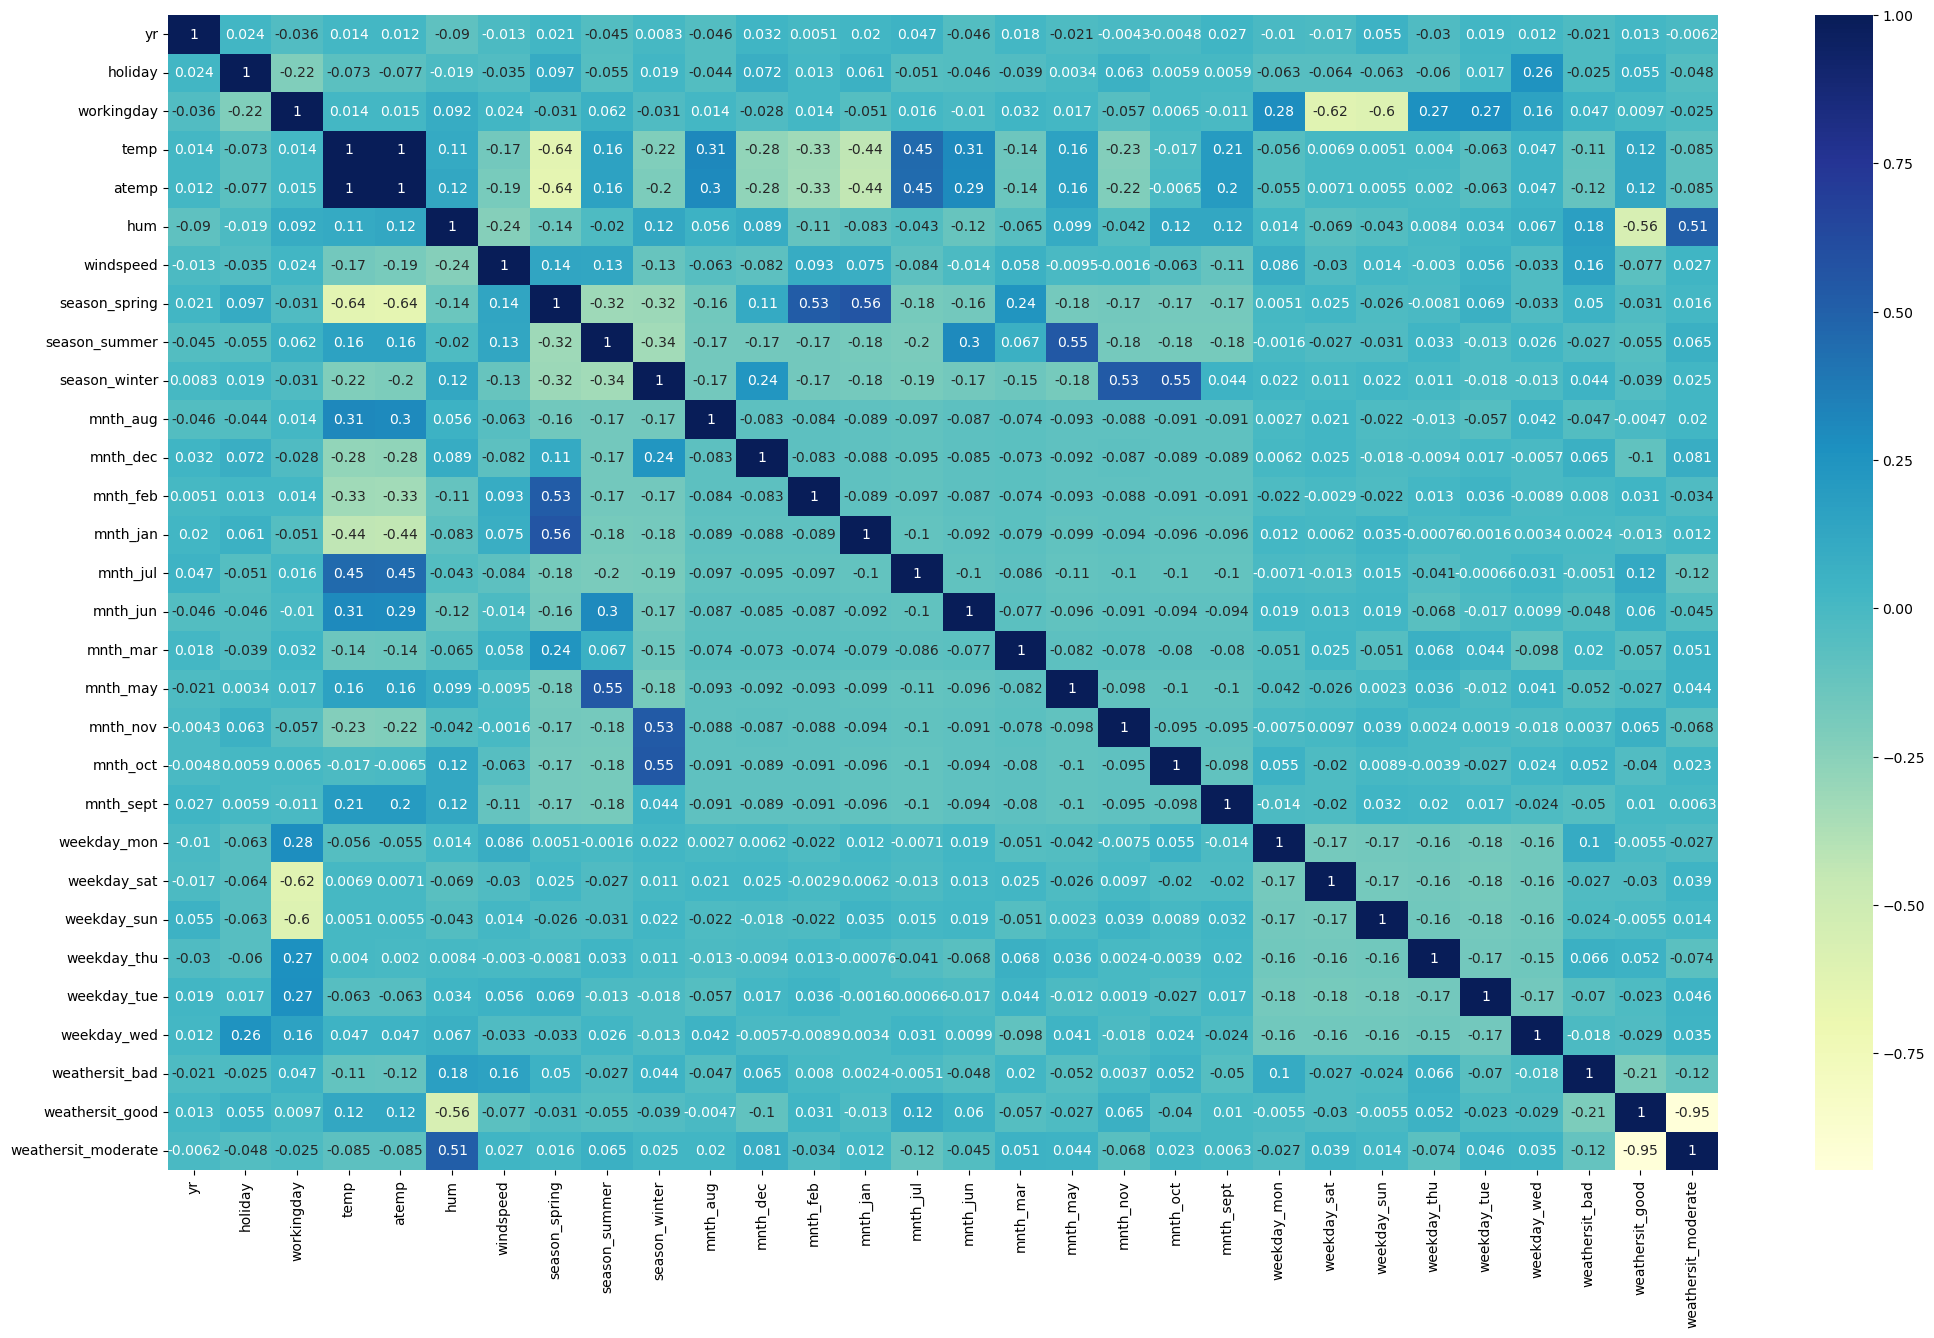

In [35]:
#Check if variables are highly correlated
plt.figure(figsize = (25,15))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Linear Regression Models

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [65]:

#Reduce number of features to 15 using automated approach
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [66]:
RFE(estimator=LinearRegression(), n_features_to_select=15)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [67]:
rfe_vars=X_train.columns[rfe.support_]
rfe_vars

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_may', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [68]:
# Adding a constant to X_train_rfe

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,temp,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jul,mnth_may,mnth_nov,mnth_sept,weathersit_bad,weathersit_good
328,1.0,0,0,0.393589,0.395893,0.668831,0.191619,False,True,False,False,False,True,False,False,True
153,1.0,0,0,0.698871,0.666902,0.367966,0.577906,False,False,False,False,False,False,False,False,True
75,1.0,0,0,0.443431,0.434828,0.626407,0.468847,True,False,False,False,False,False,False,False,True
585,1.0,1,0,0.868126,0.814409,0.644589,0.334898,False,False,False,False,False,False,False,False,True
277,1.0,0,0,0.597110,0.588150,0.673161,0.387873,False,True,False,False,False,False,False,False,True


In [69]:
#Check the Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 14),
 ('mnth_jan', False, 9),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 2),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', False, 7),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_may', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [71]:

X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_mar', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [77]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train.astype(float), X_train_sm.astype(float)).fit()
    print(lm.summary())
    return lm




In [78]:


#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [79]:
#Print Columns selected by RFE. Let us manually eliminate for these columns
X_train.columns[rfe.support_]


Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_may', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [80]:
# View features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_mar', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [81]:
# Take columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

# Model- 1

In [82]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     149.8
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.46e-158
Time:                        23:50:58   Log-Likelihood:                -3527.3
No. Observations:                 438   AIC:                             7087.
Df Residuals:                     422   BIC:                             7152.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2761.1697    

# Model 2 

In [83]:
# Let us drop the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     160.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.37e-159
Time:                        23:59:41   Log-Likelihood:                -3527.6
No. Observations:                 438   AIC:                             7085.
Df Residuals:                     423   BIC:                             7146.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2732.8889    

#  Model 3

In [84]:
# Let us drop the variable "holiday" as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.18e-154
Time:                        00:01:26   Log-Likelihood:                -3544.8
No. Observations:                 438   AIC:                             7116.
Df Residuals:                     425   BIC:                             7169.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1860.5616    

# Model 4


In [85]:
# Let us drop the variable "weekday_sat" as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.13e-155
Time:                        00:03:04   Log-Likelihood:                -3545.1
No. Observations:                 438   AIC:                             7114.
Df Residuals:                     426   BIC:                             7163.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1906.2607    

# Model 5


In [87]:
# Let us drop the variable "mnth_sept" as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul',  
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     195.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.90e-152
Time:                        00:06:09   Log-Likelihood:                -3554.9
No. Observations:                 438   AIC:                             7132.
Df Residuals:                     427   BIC:                             7177.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2098.1655    

# Model 6


In [93]:
# Let us drop the variable "temp" as it has negative coefficient and is insignificant as it has high p-value
cols6 = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul',  
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     143.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.12e-123
Time:                        00:10:03   Log-Likelihood:                -3626.9
No. Observations:                 438   AIC:                             7274.
Df Residuals:                     428   BIC:                             7315.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5449.7554    

In [94]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [95]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

5449.755354880917 [ 2045.09926993  -137.59470166 -1045.51997257 -3089.97038588
  -530.79317569  -787.53050955  -337.66525155 -2333.90002751
  -766.89319665]


In [96]:

y_train_pred = lr.predict(X_train[cols6])

# Prediction of R- Square value

In [97]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7509108791890349

# Prediction on test dataset

In [104]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [113]:
cols6 = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul',  
       'weathersit_bad', 'weathersit_moderate']
#Predicting test data values
y_test_pred = lr.predict(X_test[cols6])

In [114]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.6753172430494753

In [115]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.6753172430494753

Text(0, 0.5, 'y_pred')

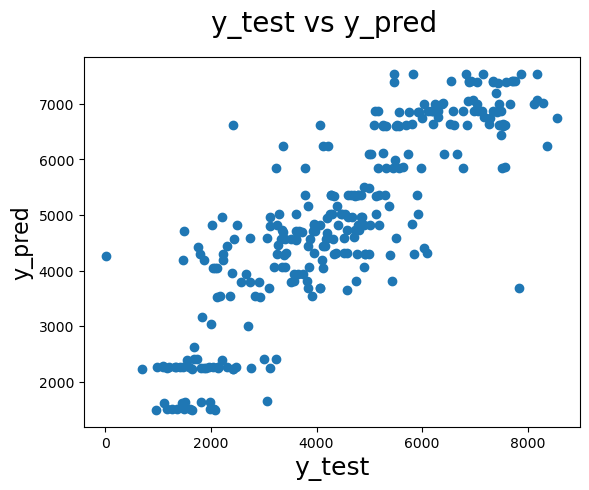

In [116]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)

An R-Squared value of 0.7509 on the test data indicates that the model is a strong predictor, capturing 75.09% of the variance. This accuracy can be further enhanced with other regression techniques. Analysis shows that on hot days, bike availability should be increased due to higher booking likelihood. Conversely, bookings decrease on bad weather days, such as snowy or rainy periods. To counteract this, the company could offer promotions to attract customers and boost bookings during adverse weather   
